In [1]:
import numpy as np
import pandas as pn
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import RandomForestClassifier as RC
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_format = 'svg'


In [2]:
data = pn.read_csv('~/anaconda3/Kurs_project_task/train.csv')

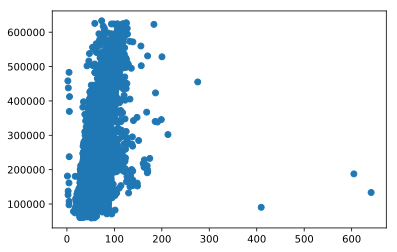

In [3]:
plt.scatter(data['Square'], data['Price'])


In [4]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
def data_change(data):
    data.loc[data['Floor']==0, 'Floor'] = int(data['Floor'].mean())
    data.loc[data['Floor']>data['HouseFloor'], 'HouseFloor'] = data['Floor']
    data['LifeSquare'].fillna(data['LifeSquare'].mean(), inplace = True)
    data = data.drop(['Healthcare_1'], axis = 1)
    data.loc[data['Square']>250, 'Square']= 150
    data.loc[data['LifeSquare']>150]=100
    data.loc[data['Rooms']==19, 'Rooms']=1
    data.loc[data['Rooms']==10, 'Rooms']=2
    data.loc[data['Rooms']<1, 'Rooms']=1
    data.loc[data['HouseYear']>2020, 'HouseYear']=2008
    data.loc[data['KitchenSquare']<6, 'KitchenSquare'] = 6
    data.loc[data['KitchenSquare']>20, 'KitchenSquare'] = data['KitchenSquare'].mean()
    data.loc[data['LifeSquare'] < 14, 'LifeSquare'] = 14
    data.loc[(data['Rooms']==2)&(data['LifeSquare']<25), 'LifeSquare'] = 28
    data.loc[(data['Rooms']==3)&(data['LifeSquare']<38), 'LifeSquare'] = 42
    data.loc[(data['Rooms']==5)&(data['LifeSquare']<65), 'LifeSquare'] = 70
    data.loc[(data['Rooms']==4)&(data['LifeSquare']<45), 'LifeSquare'] = 55
    data.loc[data['Square']<data['LifeSquare'], 'Square'] = data['LifeSquare']+data['KitchenSquare']
    data = pn.get_dummies(data)
    return data

In [6]:
data = data_change(data)

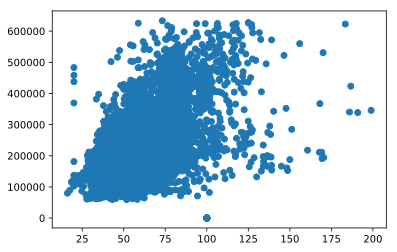

In [7]:
plt.scatter(data['Square'], data['Price'])


In [8]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Ecology_2_100,Ecology_2_A,Ecology_2_B,Ecology_3_100,Ecology_3_A,Ecology_3_B,Shops_2_100,Shops_2_A,Shops_2_B
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8368.112600,50.475500,2.034300,56.654402,37.027592,7.467452,8.667400,13.571800,1982.027000,0.268724,...,213744.267686,0.001500,0.009700,0.988800,0.001500,0.027400,0.971100,0.001500,0.082400,0.916100
std,4865.163001,43.605682,3.882864,18.800852,14.804165,2.039197,6.320852,6.942713,75.231298,3.867499,...,93068.861581,0.038703,0.098015,0.105241,0.038703,0.163254,0.167534,0.038703,0.274987,0.277252
min,0.000000,0.000000,1.000000,16.117154,14.000000,6.000000,1.000000,1.000000,100.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4150.750000,20.000000,1.000000,42.327873,27.982505,6.000000,4.000000,9.000000,1974.000000,0.017647,...,153637.969754,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,8385.000000,36.000000,2.000000,52.939624,37.199645,6.000000,7.000000,14.000000,1977.000000,0.075424,...,192072.978769,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,12584.250000,75.000000,2.000000,66.342998,42.000000,9.000000,12.000000,17.000000,2001.000000,0.195781,...,249067.022116,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,16798.000000,209.000000,100.000000,198.930182,138.910187,20.000000,100.000000,117.000000,2020.000000,100.000000,...,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
MLR = LR() 

In [10]:
target = data['Price']
feature = data.drop(['Price'], axis=1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state=42)

In [12]:
MLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
prediction = MLR.predict(X_test)

In [14]:
r2(y_test, prediction)

0.5324468022148082

In [15]:
mse(y_test, prediction)

4057257384.2738895

In [16]:
'''
parameters = [{'n_estimators': [500, 1000, 1500], 
               'max_depth': [10, 15, 20]}]
CVmodel = GridSearchCV(estimator=RF(random_state=100),
                       param_grid=parameters,
                       scoring='r2',
                       cv=3)
'''

"\nparameters = [{'n_estimators': [500, 1000, 1500], \n               'max_depth': [10, 15, 20]}]\nCVmodel = GridSearchCV(estimator=RF(random_state=100),\n                       param_grid=parameters,\n                       scoring='r2',\n                       cv=3)\n"

In [17]:
# CVmodel.fit(X_train, y_train)

In [18]:
#CVmodel.best_params_

In [19]:
MFR = RF(n_estimators=1500, max_depth=20, min_samples_leaf=5)

In [20]:
MFR.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
predictionF = MFR.predict(X_test)

In [22]:
r2(y_test,predictionF)

0.7108357834441972

In [23]:
data_test = pn.read_csv('~/anaconda3/Kurs_project_task/test.csv')

In [24]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [25]:
data_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [26]:
data_test = data_change(data_test)

In [27]:
data_test_predict = MFR.predict(data_test)

In [28]:
results = pn.concat([data_test['Id'], pn.Series(data_test_predict)], axis=1)


In [29]:
results.rename(columns={0:'Price'})

,Id,Price
0,725,160401.509551
1,15856,211921.092457
2,5480,216237.581293
3,15664,353325.097847
4,14275,139246.499917
5,7633,206835.397749
6,13329,180693.578554
7,5502,218707.744675
8,4220,295118.166269
9,11538,212821.953965


In [33]:
results.to_csv('PGobelkov_predictions.csv', index=None)